In [132]:
"""
Data source: 
Mohan S Acharya, Asfia Armaan, Aneeta S Antony : 
A Comparison of Regression Models for Prediction of Graduate Admissions, 
IEEE International Conference on Computational Intelligence in Data Science 2019
"""
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR

# Part 1: Visualizing the Data

In [112]:
data_file = "../data/graduate_admission.csv"
data = pd.read_csv(data_file)
# Column keys
SER_KEY = "Serial No."
GRE_KEY = "GRE Score"
TOEFL_KEY = "TOEFL Score"
UNI_KEY = "University Rating"
SOP_KEY = "SOP"
LOR_KEY = "LOR " # Note the trailing space character
CGPA_KEY = "CGPA"
RES_KEY = "Research"
CHANCE_ADMIT_KEY = "Chance of Admit"
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


# GRE Scores

Mean GRE score: 316.472
Median GRE score: 317.0
Min GRE score: 290
Max GRE score: 340


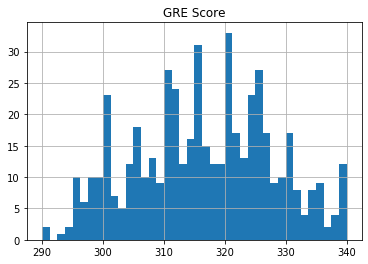

In [113]:
data.hist(column=GRE_KEY, bins=40)
print(f"Mean GRE score: {data[GRE_KEY].mean()}")
print(f"Median GRE score: {data[GRE_KEY].median()}")
print(f"Min GRE score: {data[GRE_KEY].min()}")
print(f"Max GRE score: {data[GRE_KEY].max()}")

# TOEFL Scores

Mean TOEFL score: 107.192
Median TOEFL score: 107.0
Min TOEFL score: 92
Max TOEFL score: 120


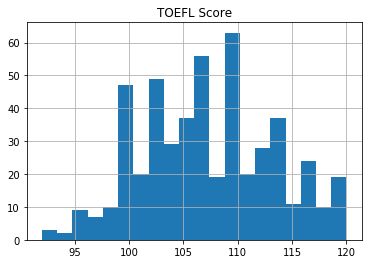

In [114]:
data.hist(column=TOEFL_KEY, bins=20)
print(f"Mean TOEFL score: {data[TOEFL_KEY].mean()}")
print(f"Median TOEFL score: {data[TOEFL_KEY].median()}")
print(f"Min TOEFL score: {data[TOEFL_KEY].min()}")
print(f"Max TOEFL score: {data[TOEFL_KEY].max()}")

# University Ratings

Mean University rating: 3.114
Median University rating: 3.0
Min University rating: 1
Max University rating: 5


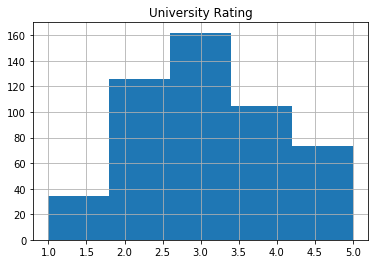

In [115]:
data.hist(column=UNI_KEY, bins=5)
print(f"Mean University rating: {data[UNI_KEY].mean()}")
print(f"Median University rating: {data[UNI_KEY].median()}")
print(f"Min University rating: {data[UNI_KEY].min()}")
print(f"Max University rating: {data[UNI_KEY].max()}")

# SOP

Mean SOP: 3.374
Median SOP: 3.5
Min SOP: 1.0
Max SOP: 5.0


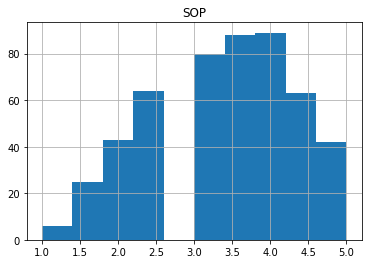

In [116]:
data.hist(column=SOP_KEY, bins=10)
print(f"Mean SOP: {data[SOP_KEY].mean()}")
print(f"Median SOP: {data[SOP_KEY].median()}")
print(f"Min SOP: {data[SOP_KEY].min()}")
print(f"Max SOP: {data[SOP_KEY].max()}")

# LOR

Mean LOR: 3.484
Median LOR: 3.5
Min LOR: 1.0
Max LOR: 5.0


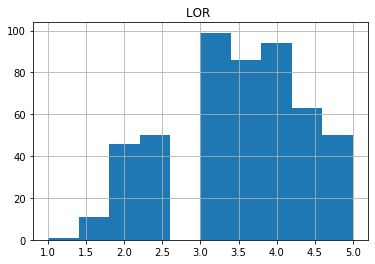

In [117]:
data.hist(column=LOR_KEY, bins=10)
print(f"Mean LOR: {data[LOR_KEY].mean()}")
print(f"Median LOR: {data[LOR_KEY].median()}")
print(f"Min LOR: {data[LOR_KEY].min()}")
print(f"Max LOR: {data[LOR_KEY].max()}")

# CGPA

Mean CGPA: 8.576440000000003
Median CGPA: 8.56
Min CGPA: 6.8
Max CGPA: 9.92


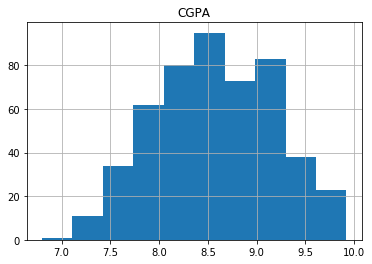

In [118]:
data.hist(column=CGPA_KEY, bins=10)
print(f"Mean CGPA: {data[CGPA_KEY].mean()}")
print(f"Median CGPA: {data[CGPA_KEY].median()}")
print(f"Min CGPA: {data[CGPA_KEY].min()}")
print(f"Max CGPA: {data[CGPA_KEY].max()}")

# Analysis
All of the features seem to be normally distributed.

# Part 2: Predictive Models

## Data Preprocessing

In [151]:
# Separate the data into training and validation sets
train_full = data.iloc[:400, :]
test_full = data.iloc[400:500, :]

# The last column, chance of admit, is how the accuracy of a model will be measured
train_X = train_full.iloc[:, 1:8]
train_y = train_full.iloc[:, 8]

test_X = test_full.iloc[:, 1:8]
test_y = test_full.iloc[:, 8]

In [121]:
# Standardized version of data
std_train_X = (train_X - train_X.mean()) / train_X.std()
std_test_X = (test_X - test_X.mean()) / test_X.std()

In [156]:
# Dimensionality reduction
pca = PCA(n_components=5)
pca.fit_transform(train_X)
pca.explained_variance_ratio_


array([0.93475206, 0.05385856, 0.00667412, 0.00203262, 0.00136517])

In [158]:
abs(pca.components_)

array([[0.89819828, 0.4275918 , 0.06292448, 0.05114292, 0.04108918,
        0.04030481, 0.02274241],
       [0.43691217, 0.89218293, 0.07214279, 0.07189561, 0.0420899 ,
        0.02984636, 0.00902454],
       [0.03835209, 0.14153134, 0.5914209 , 0.57456691, 0.52664488,
        0.13181441, 0.06214754],
       [0.00412821, 0.01462852, 0.78376371, 0.31296638, 0.53517441,
        0.0176306 , 0.0285128 ],
       [0.00344895, 0.01365111, 0.14594928, 0.74022474, 0.64987981,
        0.02934337, 0.08580841]])

In [133]:
def run_classifiers(classifiers, train_X, train_y, test_X, test_y):
    """
    Fits each classifier to the training data and runs it on the test data.
    Prints out the training and test mean squared errors. 
    """
    # Baseline: a random predictor that assigns a probability of 0.5 to each data point
    rand_train_mse = mean_squared_error(train_y.values, np.full(400, 0.5))
    rand_test_mse = mean_squared_error(test_y.values, np.full(100, 0.5))
    print(f"Random training MSE = {rand_train_mse}")
    print(f"Random test MSE = {rand_test_mse}")
    print()
    
    for clf in classifiers:
        print(f"Classifier: {clf}")
        clf.fit(train_X, train_y)
        train_mse = mean_squared_error(train_y.values, clf.predict(train_X))
        test_mse = mean_squared_error(test_y.values, clf.predict(test_X))

        print(f"Training MSE = {train_mse}")
        print(f"Validation MSE = {test_mse}")
        print()


In [134]:
classifiers = [
    LinearRegression(),
    BayesianRidge(),
    SGDRegressor(),
    SVR(gamma="scale")
]
run_classifiers(classifiers, train_X, train_y, test_X, test_y)

Random training MSE = 0.0706195
Random test MSE = 0.062769

Classifier: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Training MSE = 0.003986893243246914
Validation MSE = 0.001843174437604737

Classifier: BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
Training MSE = 0.00399161762002594
Validation MSE = 0.0018401359095189074

Classifier: SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
Training MSE = 2.2438244857432852e+27
Validation MSE = 2.200912